In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import struct
%matplotlib widget

In [2]:
podaci = pd.read_csv("mouse.csv", header=None)

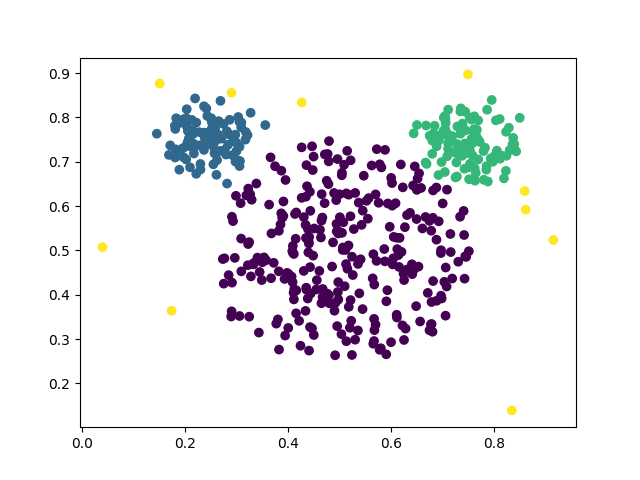

In [3]:
plt.scatter(podaci[0], podaci[1], c=podaci[2])

In [4]:
def kmeans(podaci, k, maksimalno_koraka=1000, tolerancija=0.00001):
    centri = np.random.rand(k, len(podaci[0]))
    korak = 0
    bilo_izmene = True
    while korak < maksimalno_koraka and bilo_izmene:
        grupe = [list() for i in range(k)]
        for p in podaci:
            udaljenosti = []
            for c in centri:
                udaljenosti.append(np.sum((p - c)**2))
            grupe[np.argmin(udaljenosti)].append(p)
        
        novi_centri = np.zeros(centri.shape)
        for i, g in enumerate(grupe):
            novi_centri[i] = np.average(np.array(g), 0)
        bilo_izmene = np.any(np.sum((centri - novi_centri)**2) > tolerancija)
        centri = novi_centri
        korak += 1
    print(korak)
    return centri

9
[[0.27314064 0.7342095 ]
 [0.49256575 0.44799432]
 [0.71388901 0.69441221]]


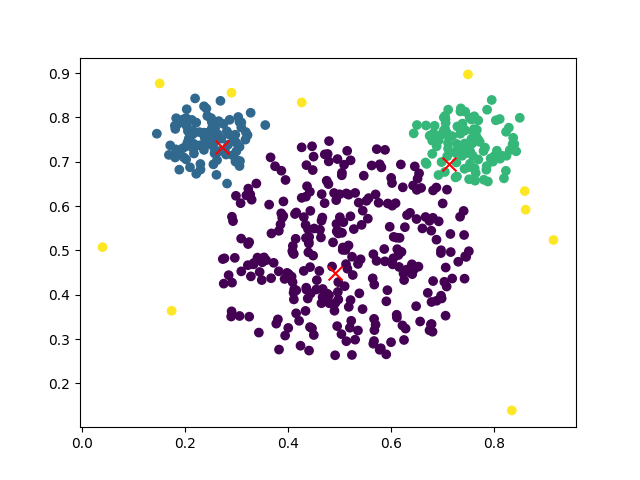

In [5]:
centri = kmeans(podaci[[0, 1]].to_numpy(), 3, maksimalno_koraka=15)
print(centri)
plt.figure()
plt.scatter(podaci[0], podaci[1], c=podaci[2])
plt.scatter(centri[:, 0], centri[:,1], c='r', marker='x', s=100)
plt.show()

In [6]:
def load_labels(path):
    with open(path, "rb") as fp:
        struct.unpack(">I", fp.read(4))
        number_of_labels = struct.unpack(">I", fp.read(4))[0]
        labels = np.frombuffer(fp.read(number_of_labels), dtype=np.uint8)
        return labels

def load_images(path):
    with open(path, "rb") as fp:
        struct.unpack(">I", fp.read(4))
        number_of_images = struct.unpack(">I", fp.read(4))[0]
        rows = struct.unpack(">I", fp.read(4))[0]
        cols = struct.unpack(">I", fp.read(4))[0]
        images = np.frombuffer(fp.read(number_of_images*rows*cols), dtype=np.uint8).reshape((number_of_images, rows, cols))
        return images

In [7]:
mnist_train_images = load_images("t10k-images.idx3-ubyte")
slike_vektori = mnist_train_images.reshape(mnist_train_images.shape[0], mnist_train_images.shape[1]*mnist_train_images.shape[2])

centri = kmeans(slike_vektori/255, 10, maksimalno_koraka=100)

print(centri)

1
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [nan nan nan ... nan nan nan]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


e:\singidunum\materijali\singi_ml_venv\lib\site-packages\numpy\lib\function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\singidunum\materijali\singi_ml_venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


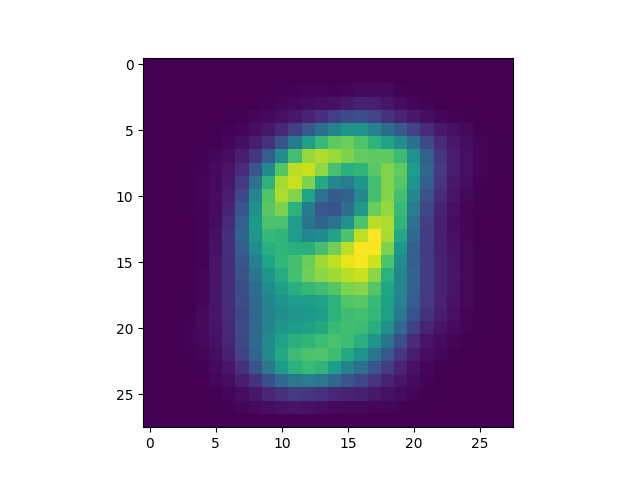

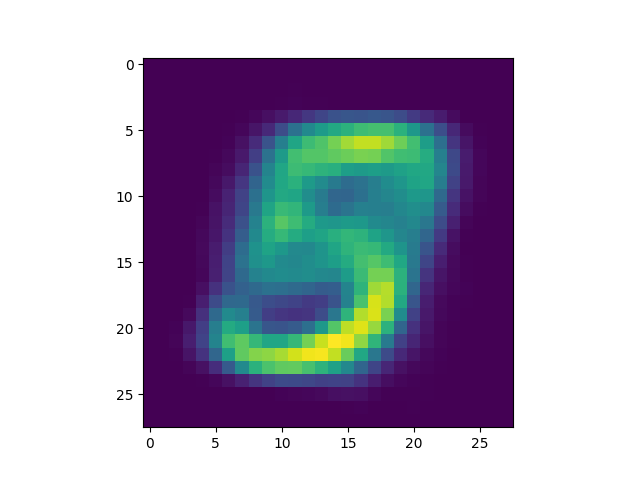

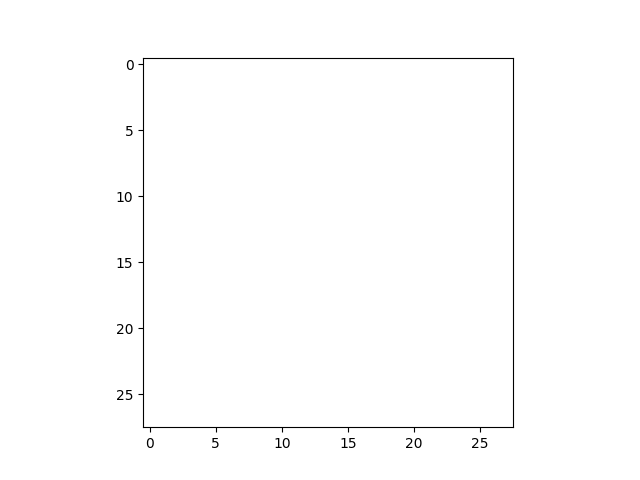

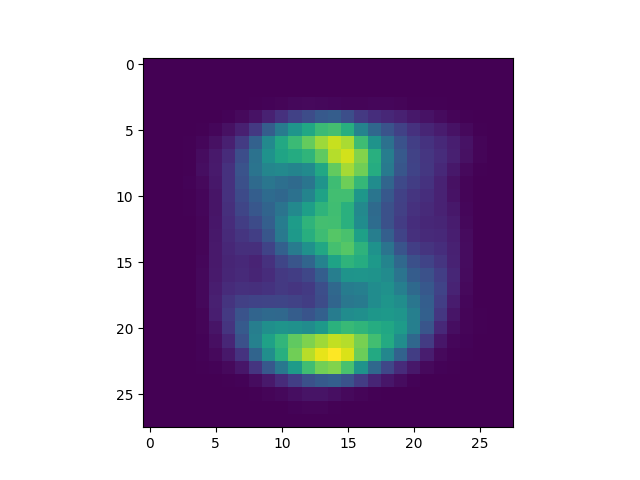

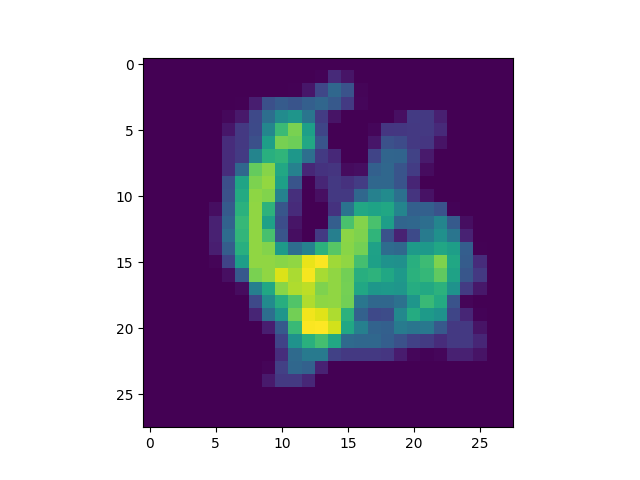

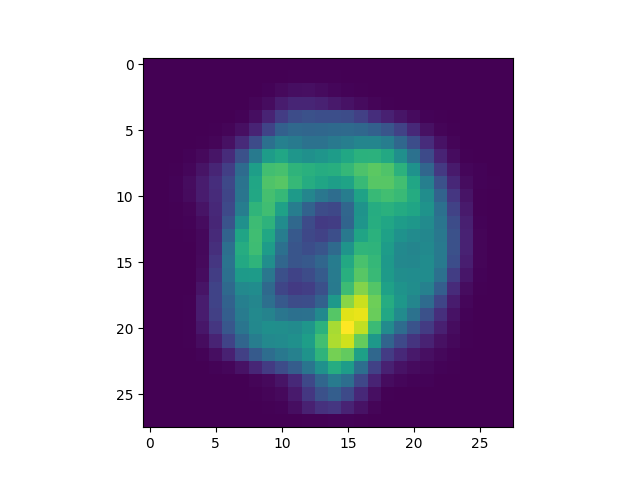

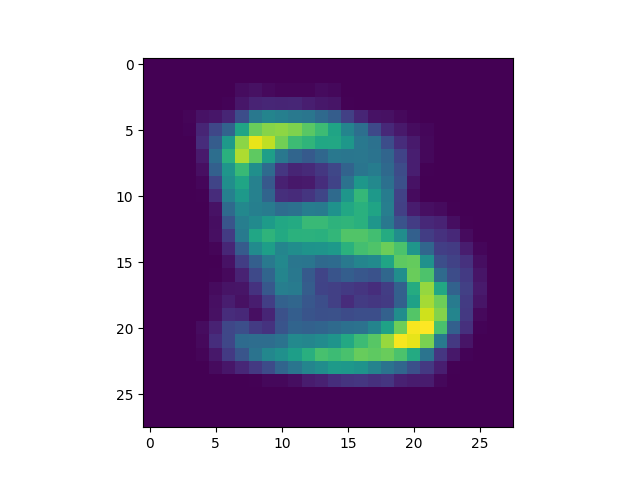

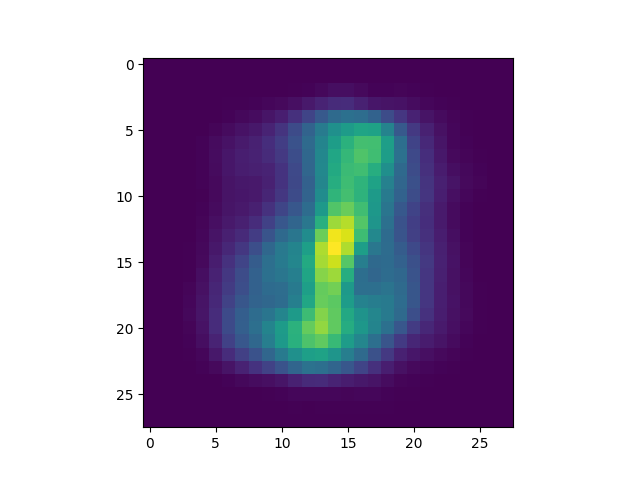

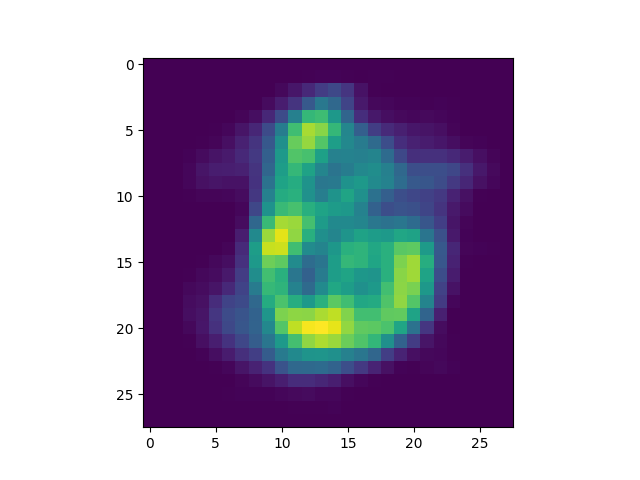

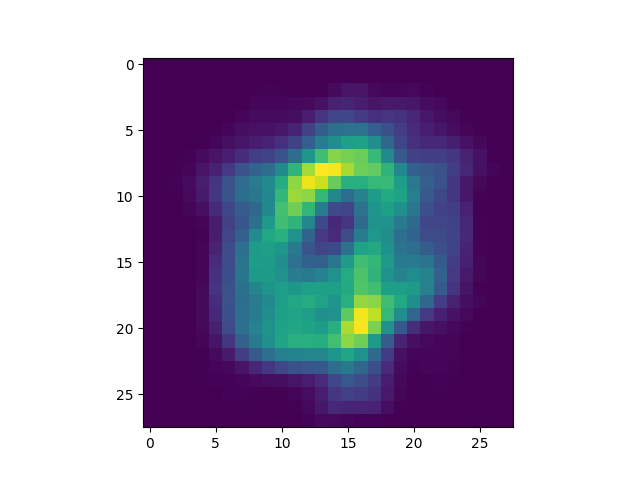

In [8]:
for c in centri:
    plt.figure()
    plt.imshow(c.reshape(28, 28))
    plt.show()

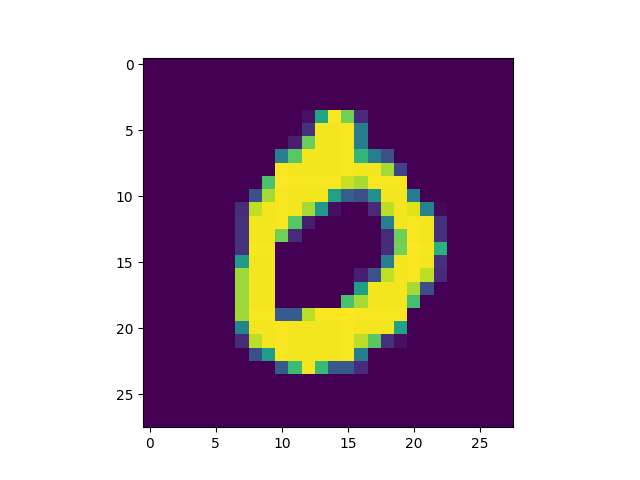

In [9]:
plt.figure()
plt.imshow(mnist_train_images[3])
plt.show()

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(slike_vektori)

KMeans(n_clusters=10)

In [11]:
kmeans.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

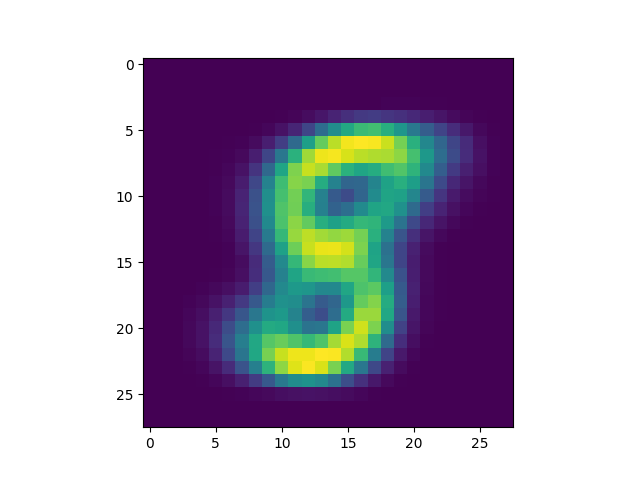

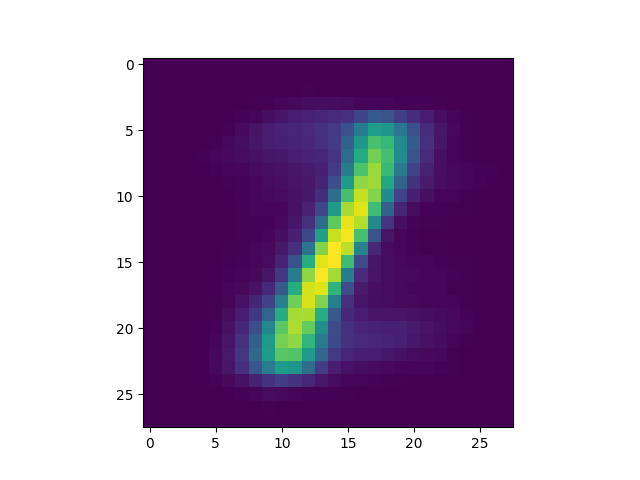

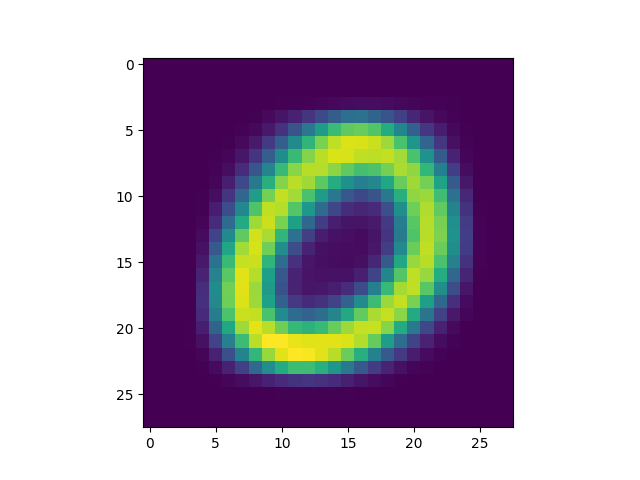

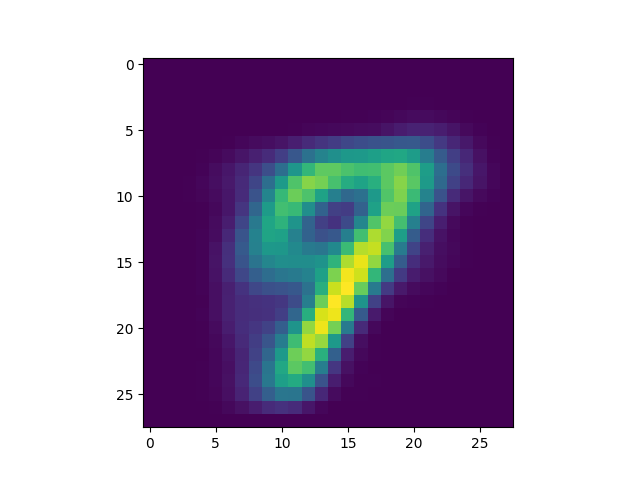

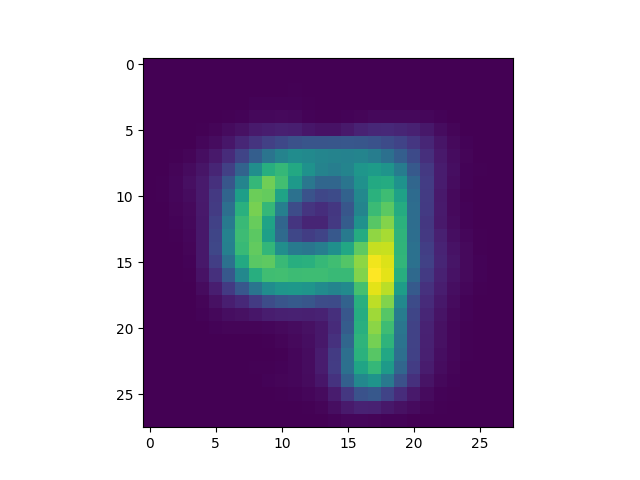

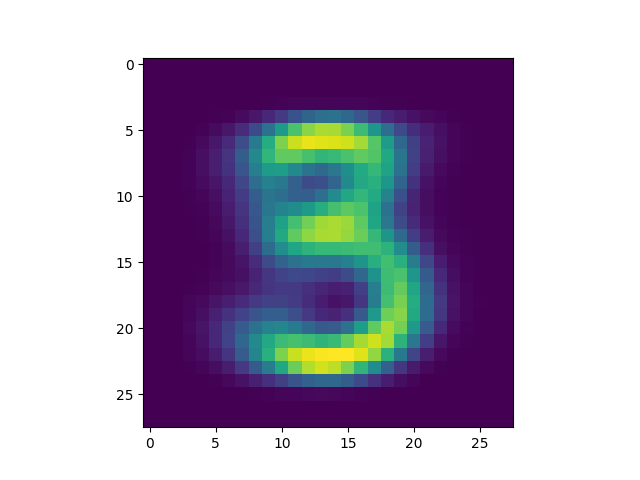

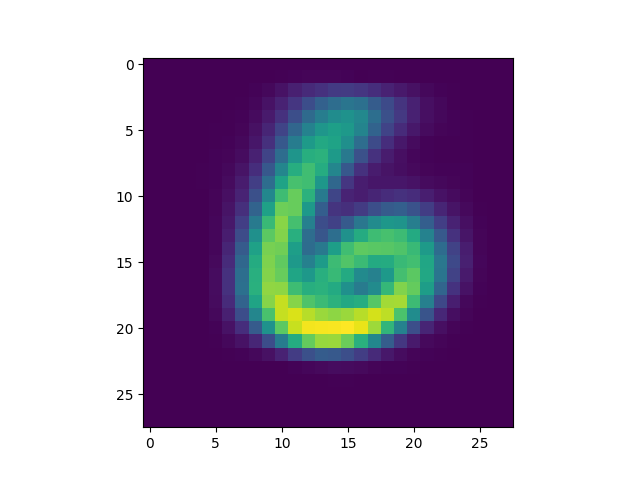

C:\Users\Ivan\AppData\Local\Temp\ipykernel_2268\1182253349.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


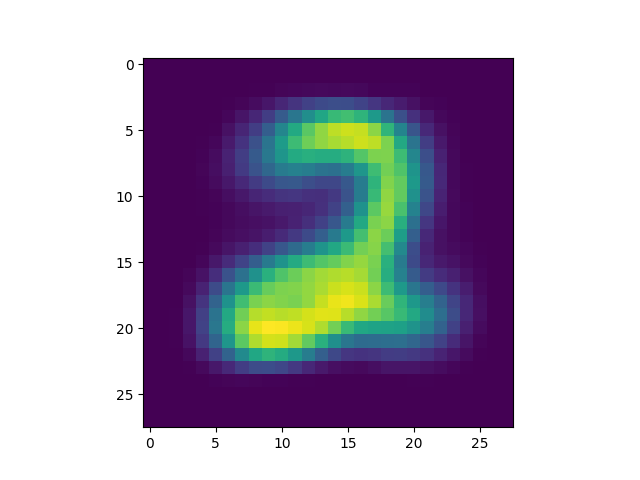

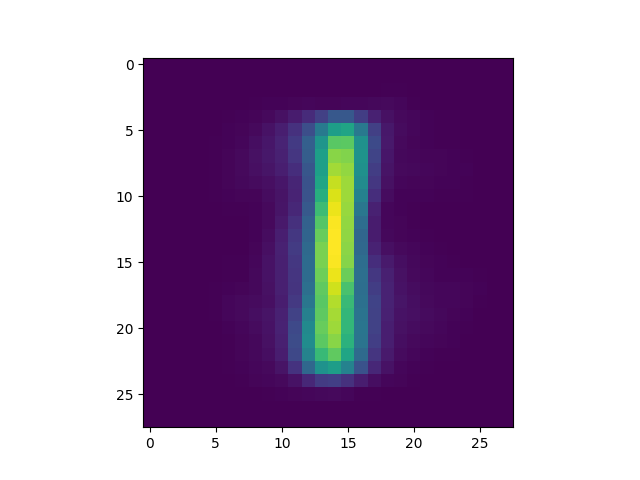

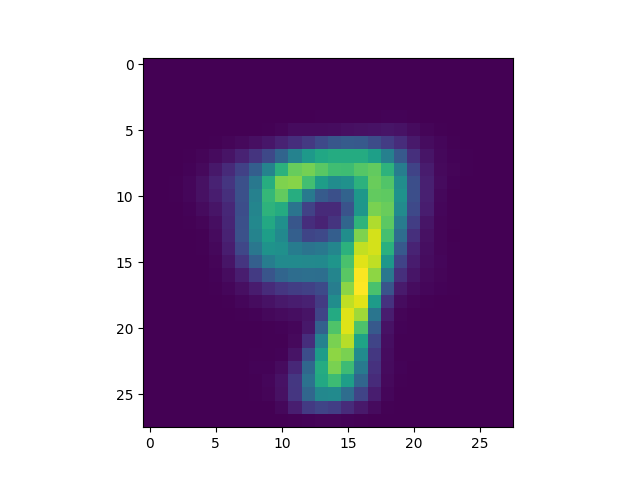

In [12]:
for c in kmeans.cluster_centers_:
    plt.figure()
    plt.imshow(c.reshape(28, 28))
    plt.show()